# 📺 IMDB MOVIES ANALYSIS

### Introduction
In this notebook, I will be analyzing the IMDB movies dataset. I will be using the [TMDB movies dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). The dataset contains information on 4.803  movies such as the title, genre, popularity and more.

Our goal is gain insights about the movies and answers key questions. We will be using the following libraries:
- Pandas
- Matplotlib
- Seaborn
- Numpy

### Table of Contents
 - Questions
 - Data cleaning
 - Exploratory Data Analysis
 - Conclusions

---

### Questions
- Q1: Which genres have the highest popularity?
- Q2: What is the relationship between the popularity and profit?
- Q3: Does higher budget result in higher profit?
- Q4: Are the longest movies more popular?
- Q5: Are there trends over time for profit and popularity?. What are they?
---


### Data Cleanning
I will install the libraries and import the data

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline

df = pd.read_csv('data/movies.csv')

Now I will explore the data in order to get some basic information about the dataset.

In [400]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

#### Handle Duplicates

In [402]:
df.duplicated().sum()

np.int64(0)

Therea are no duplicates so we can jump into the nexst step
#### Deleting columns
In this step, I will remove the columns that won't be useful for the analysis.

In [403]:
df.drop(['homepage','id', 'keywords', 'overview','production_companies', 'production_countries', 'spoken_languages', 'tagline', 'status', 'title', 'vote_count', 'vote_average'], axis=1, inplace=True)

#### Handle Missing Values

In [404]:
df.isna().sum() * 100 / len(df)

budget               0.000000
genres               0.000000
original_language    0.000000
original_title       0.000000
popularity           0.000000
release_date         0.020820
revenue              0.000000
runtime              0.041641
dtype: float64

There are only 2 columns with nulls, release_date and runtime. Since the percentage of nulls is low, I will delete the rows with them.

In [405]:
df.dropna(subset=['runtime', 'release_date'], axis=0, inplace=True)

#### Creating new columns
In this case, I will only create a new column called "profit" as a result of the subtraction between the "revenue" and "budget" columns.

In [406]:
df['profit'] = df['revenue'] - df['budget']

##### Changing the type of data
As a final step in the data preparation, I will convert the 'relase_date' column to a date format.

In [407]:
df['release_date'] = pd.to_datetime(df['release_date'])

---

### Exploratory Data Analysis

### Q1: Which genres have the highest popularity?
Our goal is to find the most interesting genres based on popularity (calculated from views, score and likes on the TMDB website).

In [408]:
""" df['genres'] = df['genres'].apply(ast.literal_eval)

genres = df['genres'].explode()
genres_list = genres.value_counts()

genres_list """

df['genres'] = df['genres'].apply(ast.literal_eval)
genres = df.explode('genres')

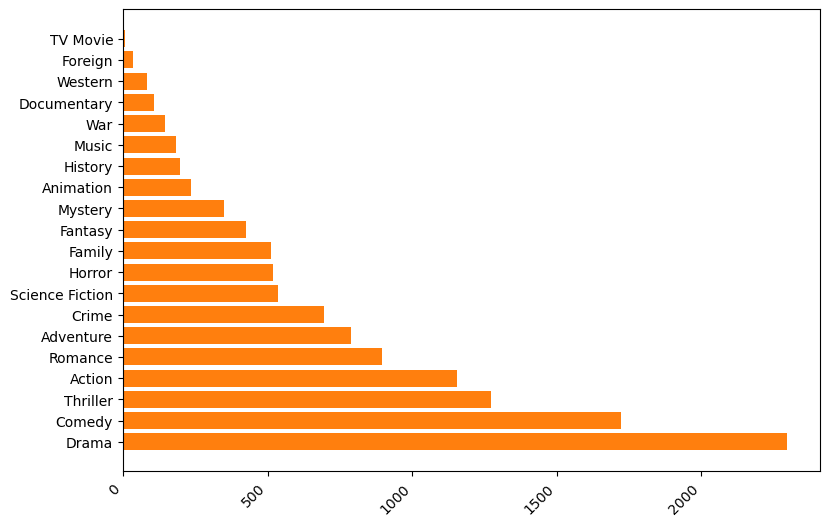

In [409]:

plt.figure(figsize=(9,6))

genre_counts = genres['genres'].value_counts()

plt.barh(genre_counts.index, genre_counts.values, color='C1')

plt.xticks(rotation=45, ha='right')
plt.show()

Here we can see that the genres with the most appearances in our dataset are Dramam, Comedy, Thriller, Action, Romance and Adventure. Now, we are going to compare these genres with the popularity

In [410]:
df['popularity'].describe()

count    4800.000000
mean       21.505569
std        31.822163
min         0.000372
25%         4.682212
50%        12.928897
75%        28.350628
max       875.581305
Name: popularity, dtype: float64

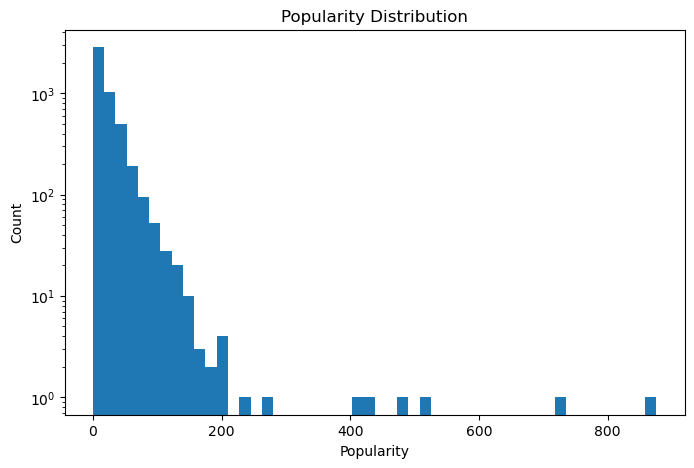

In [411]:
plt.figure(figsize=(8,5))
df['popularity'].plot(kind='hist', bins=50, log=True)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Popularity Distribution')
plt.show()

It seems that we have outliers that skew our graphs ans tables. These outliers are what we call 'blockbusters', huge projects with big budgets.

In [412]:
df[df['popularity'] > 100].sort_values('popularity', ascending=False).head(5)


,budget,genres,original_language,original_title,popularity,release_date,revenue,runtime,profit
546,74000000,"[Family, Animation, Adventure, Comedy]",en,Minions,875.581305,2015-06-17,1156730962,91.0,1082730962
95,165000000,"[Adventure, Drama, Science Fiction]",en,Interstellar,724.247784,2014-11-05,675120017,169.0,510120017
788,58000000,"[Action, Adventure, Comedy]",en,Deadpool,514.569956,2016-02-09,783112979,108.0,725112979
94,170000000,"[Action, Science Fiction, Adventure]",en,Guardians of the Galaxy,481.098624,2014-07-30,773328629,121.0,603328629
127,150000000,"[Action, Adventure, Science Fiction, Thriller]",en,Mad Max: Fury Road,434.278564,2015-05-13,378858340,120.0,228858340


But now it's time to answer our question: Are the genres with the highest count the most popular?

In [423]:
genres.groupby('genres')[['popularity']].mean().sort_values('popularity', ascending=False).head(10)

,popularity
genres,
Adventure,39.268042
Animation,38.813439
Science Fiction,36.451806
Fantasy,36.387043
Action,30.940382
Family,27.832849
Mystery,24.586827
Thriller,24.460077
War,23.777289


The genres with the highest popularity are Adventure, Animation, and Science Fiction. So, we can conclude that the genres with the highest count are not the most popular ones.

---

### Q2: What is the relationship between the popularity and profit?


In [435]:
df[['budget', 'revenue', 'profit']].describe().astype(int)

,budget,revenue,profit
count,4800,4800,4800
mean,29060068,82312051,53251983
std,40730294,162895004,136002284
min,0,0,-165710090
25%,800000,0,-799306
50%,15000000,19181992,2555615
75%,40000000,92938861,55374939
max,380000000,2787965087,2550965087


As it looks like we have a lot of rows with 0 on either the budget and de revenue, I will assume that they are errors and will remove them.

In [432]:
q2_set = df[(df['budget'] > 0) & (df['revenue'] > 0)]
q2_set.head()

,budget,genres,original_language,original_title,popularity,release_date,revenue,runtime,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",en,Avatar,150.437577,2009-12-10,2787965087,162.0,2550965087
1,300000000,"[Adventure, Fantasy, Action]",en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,661000000
2,245000000,"[Action, Adventure, Crime]",en,Spectre,107.376788,2015-10-26,880674609,148.0,635674609
3,250000000,"[Action, Crime, Drama, Thriller]",en,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,834939099
4,260000000,"[Action, Adventure, Science Fiction]",en,John Carter,43.926995,2012-03-07,284139100,132.0,24139100


In [436]:
q2_set[['budget', 'revenue', 'profit']].describe().astype(int)

,budget,revenue,profit
count,3229,3229,3229
mean,40654444,121242957,80588512
std,44396741,186302864,158147947
min,1,5,-165710090
25%,10500000,17000000,211394
50%,25000000,55184721,26165571
75%,55000000,146292009,97489822
max,380000000,2787965087,2550965087


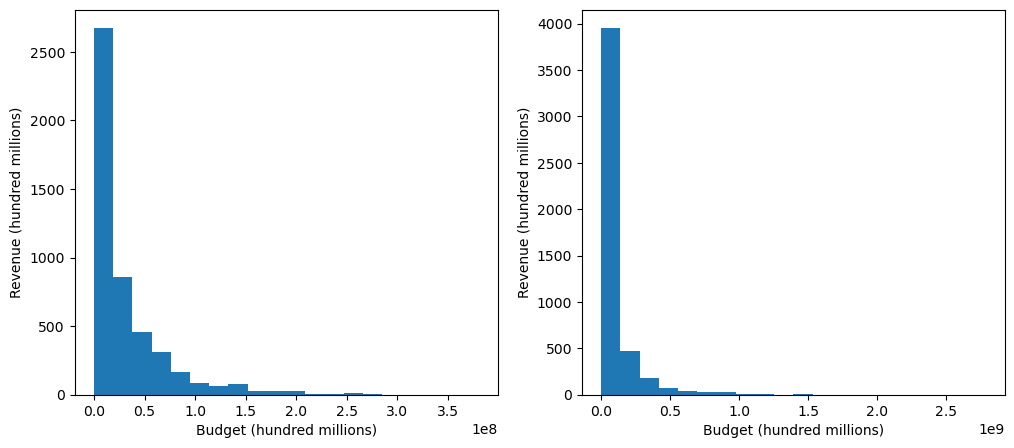

In [506]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(df['budget'], bins=20)
axes[0].set_xlabel('Budget (hundred millions)')
axes[0].set_ylabel('Revenue (hundred millions)')

axes[1].hist(df['revenue'], bins=20)
axes[1].set_xlabel('Budget (hundred millions)')
axes[1].set_ylabel('Revenue (hundred millions)')


plt.show()

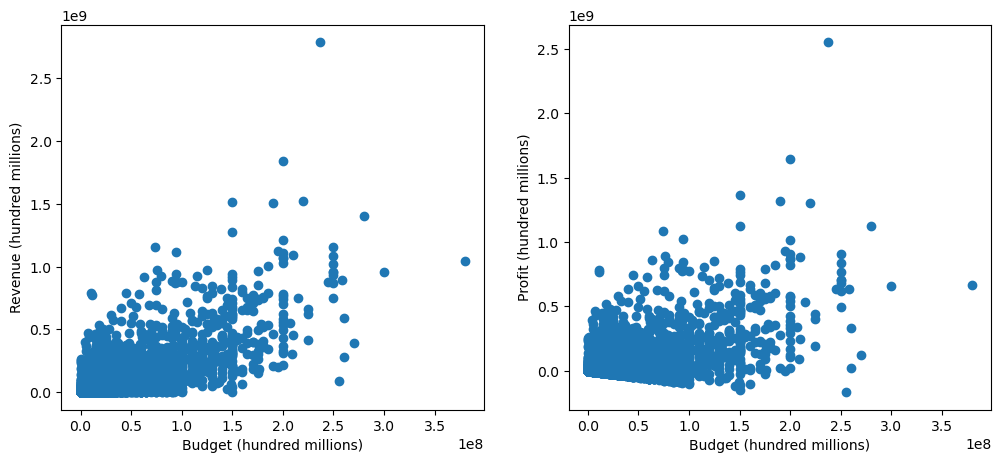

In [500]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(df['budget'], df['revenue'])
axes[0].set_xlabel('Budget (hundred millions)')
axes[0].set_ylabel('Revenue (hundred millions)')

axes[1].scatter(df['budget'], df['profit'])
axes[1].set_xlabel('Budget (hundred millions)')
axes[1].set_ylabel('Profit (hundred millions)')

plt.show()
